In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [45]:
housing = pd.read_csv('housing.csv')

In [46]:
housing.shape

(20640, 10)

In [47]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [48]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# As we can see in the above data the column total_bedroom have some missing value, so we have to treat these null values
# And the column ocean_proximity has the categorical values which is not considerable in machine learing algo.

In [49]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
# here <1H ocean means distance of house from ocean is less than 1 hours and also showing the distribution of 
# catagorical values

In [10]:
housing.describe() #for descriptive statistics of data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

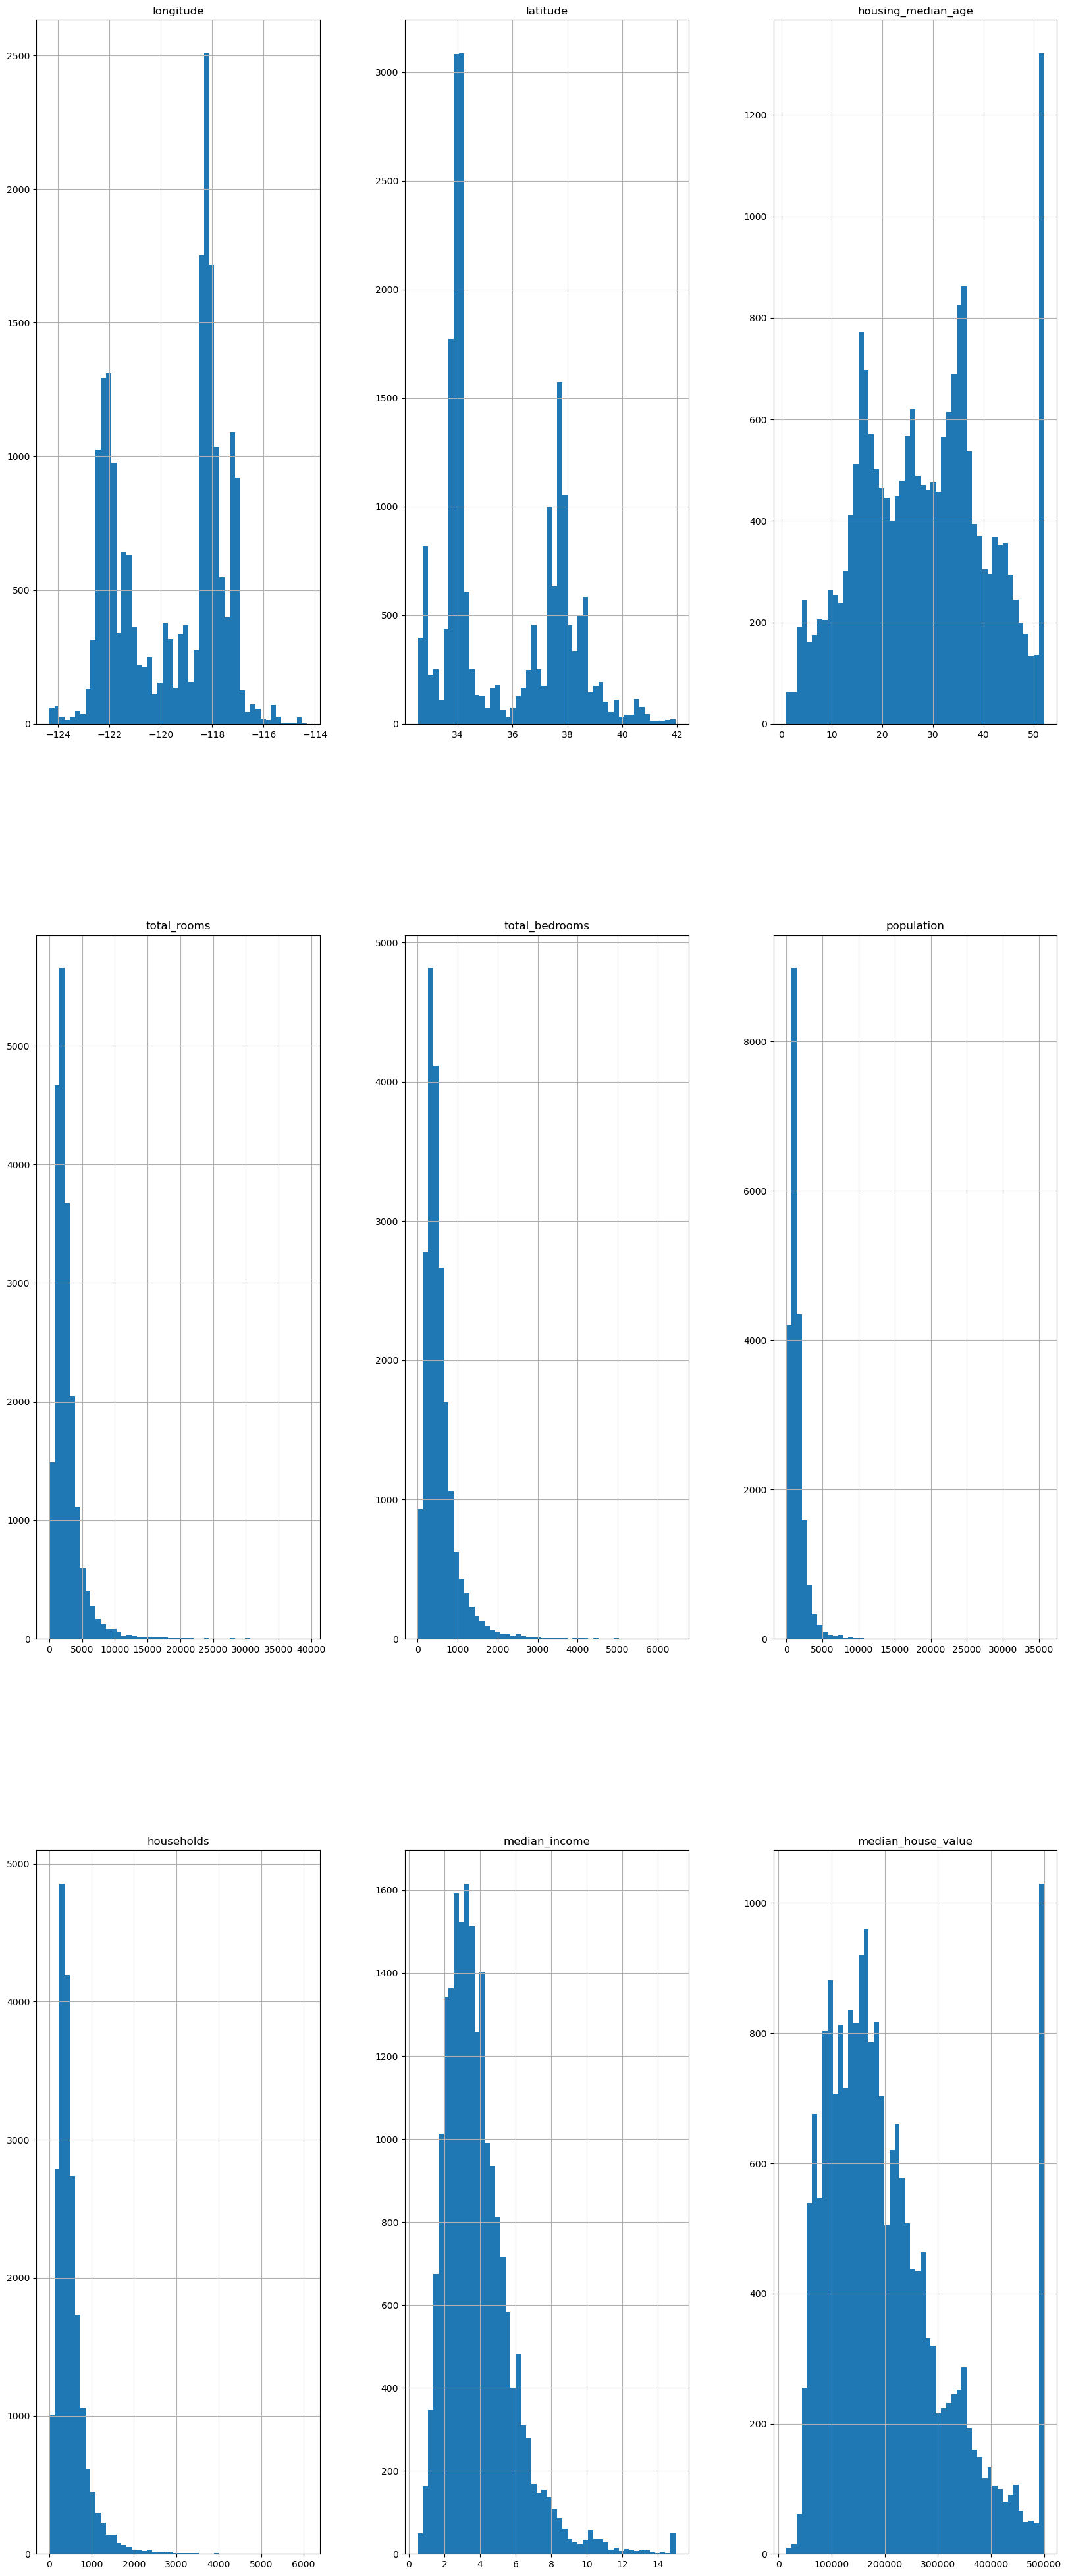

In [16]:
housing.hist(bins=50,figsize=(20,50))

<Axes: xlabel='longitude', ylabel='latitude'>

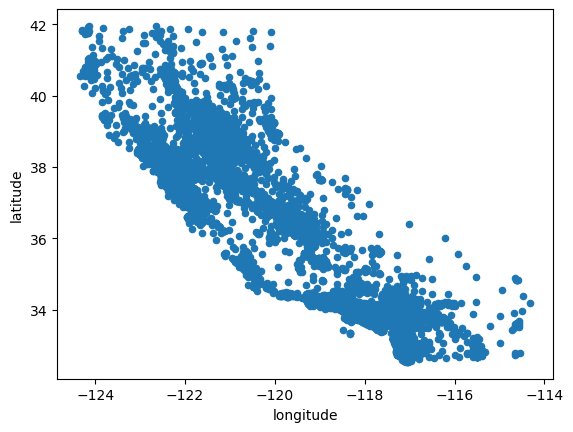

In [19]:
housing.plot(kind='scatter',x='longitude',y='latitude')

In [ ]:
#as we can see scatter plot which actually looks like map of california and many dots are overlapped so we try to show you more clear picture.

<Axes: xlabel='longitude', ylabel='latitude'>

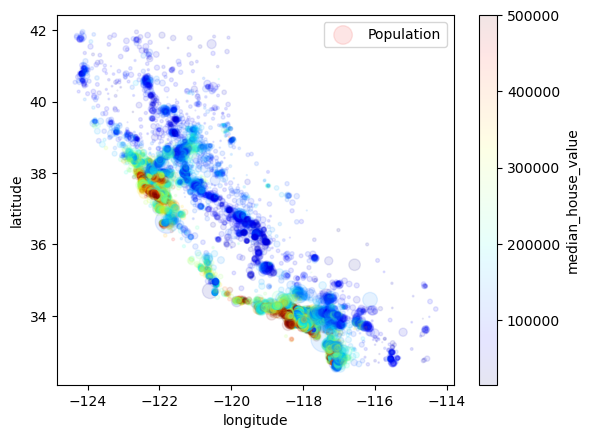

In [23]:
housing.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1,s=housing['population']/100,label='Population',
            c='median_house_value',cmap=plt.get_cmap('jet'))

In [26]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [38]:
r=housing.columns.get_loc('ocean_proximity')
r

9

In [56]:
housing1=housing.iloc[:,0:9]

In [57]:
housing1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [58]:
housing1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [59]:
corr_matrix=housing1.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [61]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [63]:
housing_na=housing.dropna(subset=['total_bedrooms'])
housing_na.shape #now it remove the row which have null values

(20433, 10)

# treatment of categorical column

In [66]:
dummies = pd.get_dummies(housing_na.ocean_proximity,dtype=int)
dummies

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [68]:
#now we will concate the dummies table with original table
housing_new = pd.concat([housing_na,dummies], axis='columns')

In [69]:
housing_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [ ]:
# now we drop ocean_proximity column and one of the binary variable column because if we not drop one column so this will
# always give regression 100% so here we drop island column

In [70]:
housing_final = housing_new.drop(['ocean_proximity','ISLAND'], axis='columns')
housing_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0


# Performing Linear Regression

In [71]:
# feature data
x= housing_final.drop(columns=['median_house_value'])
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,1,0


In [72]:
#label dataset
y = housing_final['median_house_value']
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1984)

In [76]:
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x_train, y_train)

LinearRegression()

In [79]:
# Display the intercept and coefficient of OLS model
print('Intercetpt is '+ str(OLS.intercept_))
print('The set of the coefficeints are '+ str(OLS.coef_))
print('The R squared value is '+str(OLS.score(x_train, y_train)))

Intercetpt is -2146719.4958725944
The set of the coefficeints are [-2.72191872e+04 -2.61224400e+04  1.03631750e+03 -6.39771322e+00
  9.97707401e+01 -3.73545857e+01  4.99035484e+01  3.93656164e+04
 -1.49036788e+05 -1.87787533e+05 -1.51883617e+05 -1.45673607e+05]
The R squared value is 0.6433902949192565


In [81]:
#predicting with ols
y_pred = OLS.predict(x_test)
performance = pd.DataFrame({'Prediction':y_pred,'Actual values':y_test})
performance['Error']=performance['Actual values']-performance['Prediction']
performance.head()

,Prediction,Actual values,Error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


In [82]:
# preparing data for plotting
performance.reset_index(drop=True,inplace=True)
performance.reset_index(inplace=True)
performance.head()

,index,Prediction,Actual values,Error
0,0,315646.738470,328200.0,12553.261530
1,1,235926.156196,156900.0,-79026.156196
2,2,157003.325611,87200.0,-69803.325611
3,3,172404.340246,141000.0,-31404.340246
4,4,82931.270634,100800.0,17868.729366


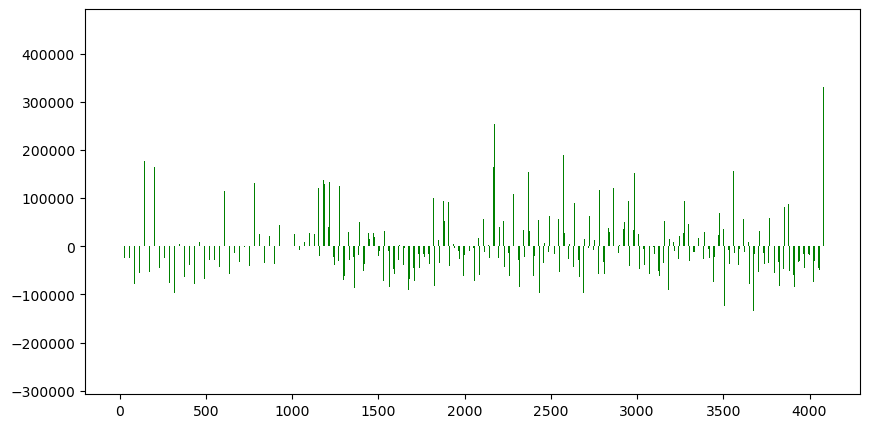

In [90]:
#plot the residuals
fig=plt.figure(figsize=(10,5))
plt.bar('index','Error', data=performance, color='green', width=0.3)
plt.xlabel=('Observations')
plt.ylabel=('Residuals')
plt.show()

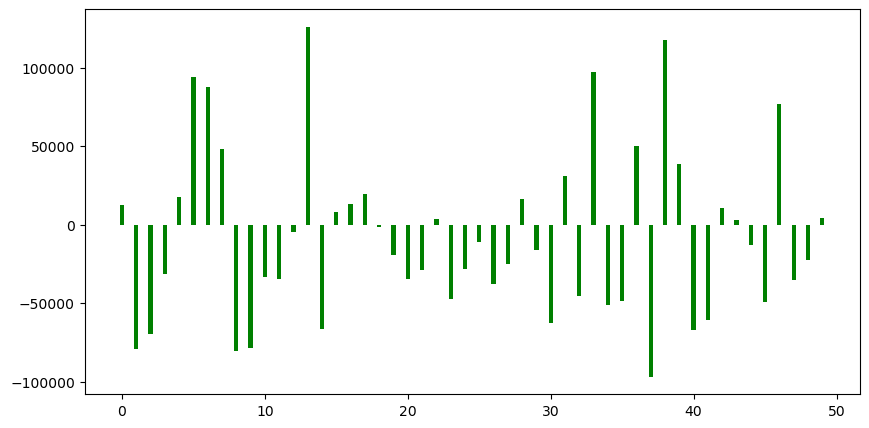

In [92]:
# First 50 observations to clearing identifying estimation
fig=plt.figure(figsize=(10,5))
plt.bar('index','Error', data=performance[:50], color='green', width=0.3)
plt.xlabel=('Observations')
plt.ylabel=('Residuals')
plt.show()

In [94]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)
nicerOLS=sm.OLS(y_train, x_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     2456.
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        01:33:17   Log-Likelihood:            -2.0522e+05
No. Observations:               16346   AIC:                         4.105e+05
Df Residuals:                   16333   BIC:                         4.106e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -2.147e+06   1.05e+05    -20.413      0.000   -2.35e+06   -1.94e+06
longitude          -2.722e+04   1141.708    -23.841      0.000   -2.95e+04    -2.5e+04
latitude           -2.612e+04   1125.571    -23.208      0.000   -2.83e+04   -2.39e+04
housing_median_age  1036.3175     49.179     21.072      0.000     939.922    1132.713
total_rooms           -6.3977      0.891     -7.184      0.000      -8.143      -4.652
total_bedrooms        99.7707      7.613     13.105      0.000      84.848     114.694
population           -37.3546      1.189    -31.405      0.000     -39.686     -35.023
households            49.9035      8.223      6.069      0.000      33.786      66.021
median_income       3.937e+04    382.254    102.983      0.000    3.86e+04    4.01e+04
<1H OCEAN           -1.49e+05   3.43e+04     -4.339      0.000   -2.16e+05   -8.17e+04
INLAND             -1.878e+05   3.44e+04     -5.456      0.000   -2.55e+05    -1.2e+05
NEAR BAY           -1.519e+05   3.44e+04     -4.416      0.000   -2.19e+05   -8.45e+04
NEAR OCEAN         -1.457e+05   3.44e+04     -4.239      0.000   -2.13e+05   -7.83e+04
==============================================================================
Omnibus:                     4103.497   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16258.145
Skew:                           1.201   Prob(JB):                         0.00
Kurtosis:                       7.255   Cond. No.                     8.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""